In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

importing data

In [28]:
df=pd.read_csv("medical_cost_insurance.csv")

In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='sex'>

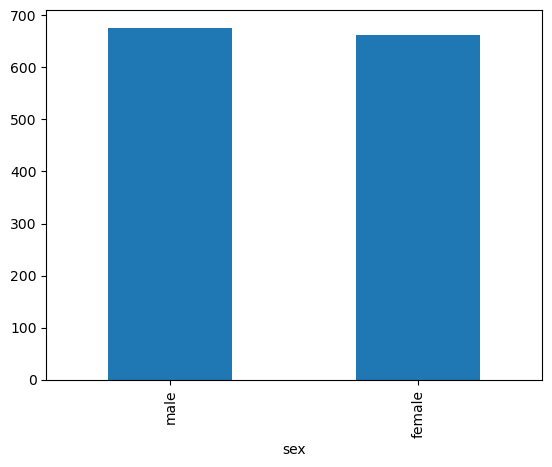

In [32]:
df["sex"].value_counts().plot(kind="bar")

<Axes: xlabel='smoker'>

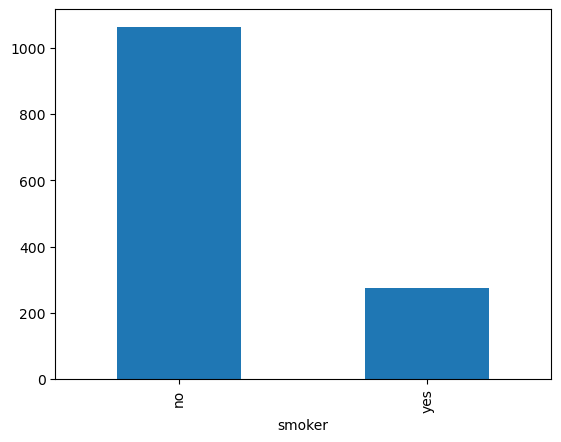

In [33]:
df["smoker"].value_counts().plot(kind="bar")

<Axes: xlabel='region'>

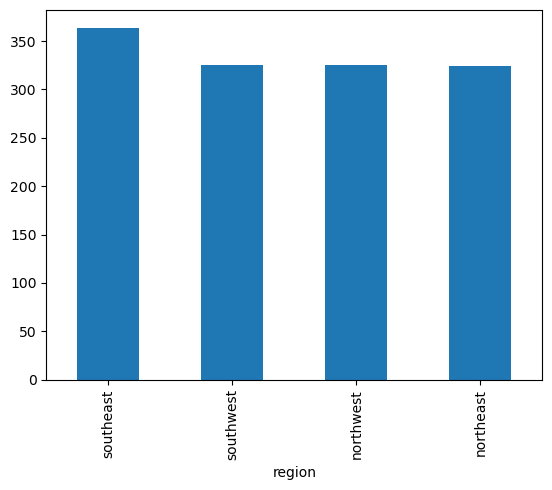

In [34]:
df["region"].value_counts().plot(kind="bar")

In [35]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [36]:
from scipy.stats import shapiro

stat, p_value = shapiro(df["age"])
print(f'Statistic: {stat}, p-value: {p_value}')


Statistic: 0.9446989893913269, p-value: 5.687060076887153e-22


In [37]:
from scipy.stats import kstest

stat, p_value = kstest(df["age"], 'norm')
print(f'Statistic: {stat}, p-value: {p_value}')


Statistic: 1.0, p-value: 0.0


In [38]:
numeric_features=['age','bmi','children']
cat_features=['sex','smoker','region']
target=["charges"]

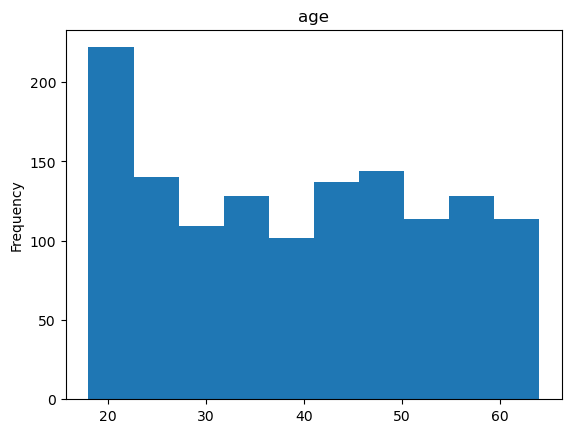

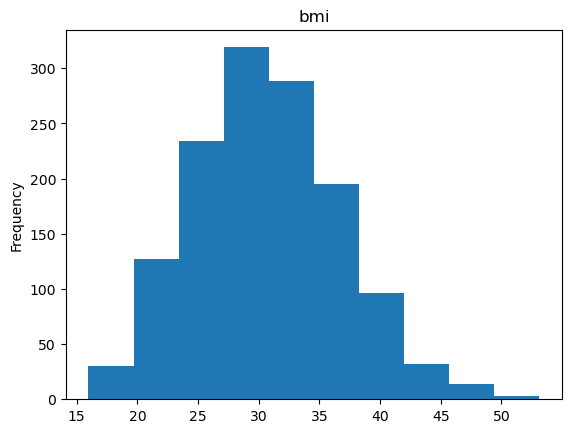

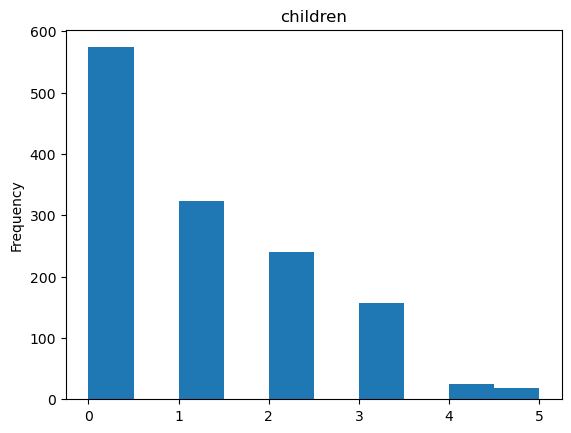

In [39]:
for column in numeric_features:
    df[column].plot(kind="hist",bins=10)
    plt.title(column)
    plt.show()

In [40]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [41]:
x=df.drop(columns=["charges"])
y=df["charges"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=66)

In [43]:
scaler=StandardScaler()
x_train[numeric_features]=scaler.fit_transform(x_train[numeric_features])
x_test[numeric_features] = scaler.transform(x_test[numeric_features])


In [44]:
for feature in cat_features:
    print(f"Unique categories in {feature} (Training):", x_train[feature].unique())
    print(f"Unique categories in {feature} (Test):", x_test[feature].unique())


Unique categories in sex (Training): ['male' 'female']
Unique categories in sex (Test): ['male' 'female']
Unique categories in smoker (Training): ['no' 'yes']
Unique categories in smoker (Test): ['no' 'yes']
Unique categories in region (Training): ['northeast' 'northwest' 'southwest' 'southeast']
Unique categories in region (Test): ['southeast' 'northwest' 'southwest' 'northeast']


In [45]:
x_test['region'] = pd.Categorical(x_test['region'], categories=x_train['region'].unique(), ordered=True)


In [49]:
x_test.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder


cat_columns = ['sex', 'smoker', 'region']


label_encoder = LabelEncoder()


for col in cat_columns:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.transform(x_test[col])


In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{type(model).__name__}: Mean Squared Error = {mse}")



LinearRegression: Mean Squared Error = 33234495.73090285
Ridge: Mean Squared Error = 33368383.276946865
Lasso: Mean Squared Error = 33238277.67527788
ElasticNet: Mean Squared Error = 95096152.7007068
RandomForestRegressor: Mean Squared Error = 21908588.795857757
GradientBoostingRegressor: Mean Squared Error = 19518866.092556693
SVR: Mean Squared Error = 157232631.74628124
KNeighborsRegressor: Mean Squared Error = 41153524.84134499


In [52]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
cv_scores=cross_val_score(gb,x_train,y_train,cv=5,scoring="neg_mean_squared_error")

In [53]:
cv_scores

array([-21626668.90449656, -18697187.27612824, -21244926.51215529,
       -20099812.00874706, -20161746.29034489])

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.2],       
    'max_depth': [3, 4, 5],                  
}
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Test Set Mean Squared Error (using best model):", mse)

Test Set Mean Squared Error (using best model): 19230939.94987631


In [56]:
print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [59]:
fm=GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators=50)
fm.fit(x_train,y_train)
y_pred=fm.predict(x_test)
mse=mean_squared_error(y_test,y_pred)

In [60]:
mse

19235444.755931634

In [ ]:
score